In [36]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.filterwarnings('ignore')

In [37]:
cifar10 = tf.keras.datasets.cifar10
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

In [38]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
np.unique(Y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [39]:
print('Training Data Shape   : ', X_train.shape)
print('Training Labels Shape : ', Y_train.shape)
print('Testing  Data Shape   : ', X_test.shape)
print('Testing Labels Shape  : ', Y_test.shape)

Training Data Shape   :  (50000, 32, 32, 3)
Training Labels Shape :  (50000, 1)
Testing  Data Shape   :  (10000, 32, 32, 3)
Testing Labels Shape  :  (10000, 1)


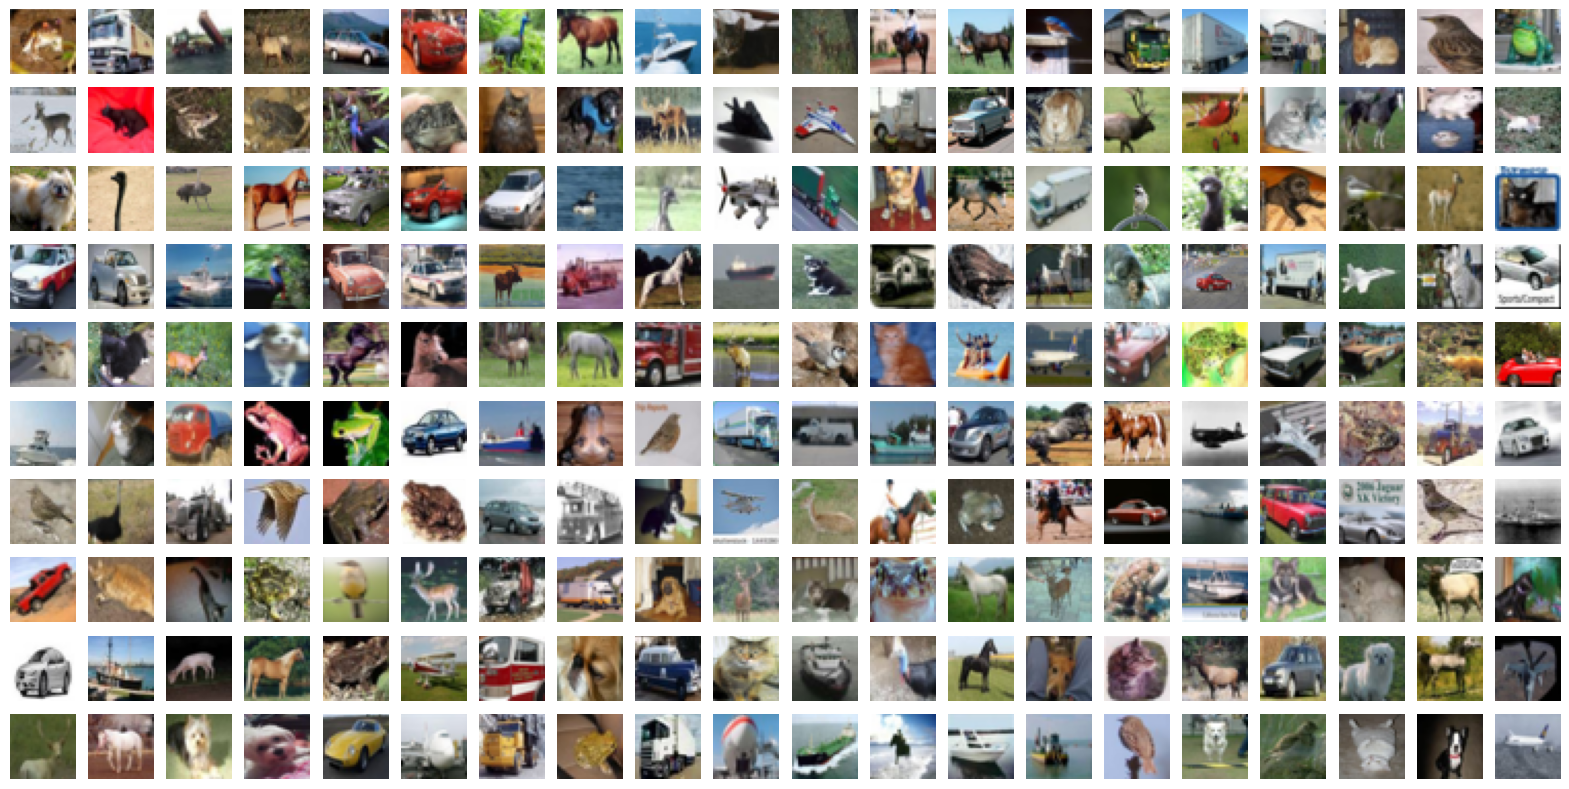

In [40]:
plt.figure(figsize = (20,10))
for i in range(200):
  plt.subplot(10,20, i+1)
  plt.axis('off')
  plt.imshow(X_train[i])

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size = 0.2)

In [42]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes = 10)
y_val   = to_categorical(y_val, num_classes = 10)

In [43]:
print('Training Data Shape     : ', x_train.shape)
print('Training Labels Shape   : ', y_train.shape)
print()
print('Validation Data Shape   : ', x_val.shape)
print('Validation Labels Shape : ', y_val.shape)
print()
print('Testing  Data Shape     : ', X_test.shape)
print('Testing Labels Shape    : ', Y_test.shape)

Training Data Shape     :  (40000, 32, 32, 3)
Training Labels Shape   :  (40000, 10)

Validation Data Shape   :  (10000, 32, 32, 3)
Validation Labels Shape :  (10000, 10)

Testing  Data Shape     :  (10000, 32, 32, 3)
Testing Labels Shape    :  (10000, 1)


In [44]:
train_datagen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 0.1,
    zoom_range = 0.1,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    vertical_flip = True,
    horizontal_flip = True
)

train_datagen.fit(x_train)
train_generator = train_datagen.flow(x_train, y_train, batch_size = 400)

In [45]:
val_datagen = ImageDataGenerator(rescale = 1/255)
val_datagen.fit(x_val)
val_generator = val_datagen.flow(x_val, y_val)

In [46]:
base_model = tf.keras.applications.VGG19(include_top = False,
                                         input_shape = (32,32,3),
                                         weights = 'imagenet')
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [47]:
model = tf.keras.models.Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(1000, activation = 'relu'))
model.add(Dense(1000, activation = 'relu'))
model.add(Dense(250, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 1, 1, 512)         20024384  
                                                                 
 flatten_2 (Flatten)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 1000)              513000    
                                                                 
 dense_7 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_8 (Dense)             (None, 250)               250250    
                                                                 
 dense_9 (Dense)             (None, 10)                2510      
                                                                 
Total params: 21791144 (83.13 MB)
Trainable params: 21

In [48]:
model.compile(optimizer = Adam(),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    validation_data = val_generator,
    epochs = 80,
    verbose = 1
)

Epoch 1/50
100/100 [==============================] - 47s 315ms/step - loss: 2.0910 - accuracy: 0.1736 - val_loss: 1.8792 - val_accuracy: 0.2284
Epoch 2/50
100/100 [==============================] - 29s 292ms/step - loss: 1.8823 - accuracy: 0.2295 - val_loss: 1.8518 - val_accuracy: 0.2310
Epoch 3/50
100/100 [==============================] - 30s 300ms/step - loss: 1.7908 - accuracy: 0.2615 - val_loss: 1.7159 - val_accuracy: 0.3069
Epoch 4/50
100/100 [==============================] - 30s 295ms/step - loss: 1.7328 - accuracy: 0.3036 - val_loss: 1.7421 - val_accuracy: 0.2979
Epoch 5/50
100/100 [==============================] - 29s 291ms/step - loss: 1.6179 - accuracy: 0.3599 - val_loss: 1.5440 - val_accuracy: 0.3972
Epoch 6/50
100/100 [==============================] - 31s 314ms/step - loss: 1.5399 - accuracy: 0.4024 - val_loss: 1.5738 - val_accuracy: 0.4097
Epoch 7/50
100/100 [==============================] - 30s 298ms/step - loss: 1.4934 - accuracy: 0.4308 - val_loss: 1.5468 - val_ac

In [ ]:
acc_train = history.history['accuracy']
acc_val   = history.history['val_accuracy']

loss_train = history.history['loss']
loss_val   = history.history['val_loss']

In [ ]:
num_epochs = range(1,81)
plt.figure(figsize = (16,6), dpi = 200)
plt.plot(num_epochs, acc_train, c = 'blue', label = 'Training Accuracy')
plt.plot(num_epochs, acc_val, c = 'red', label = 'Validation Accuracy')
plt.legend()

In [ ]:
num_epochs = range(1,81)
plt.figure(figsize = (16,6), dpi = 200)
plt.plot(num_epochs, loss_train, c = 'blue', label = 'Training Loss')
plt.plot(num_epochs, loss_val, c = 'red', label = 'Validation Loss')
plt.legend()

In [ ]:
# Evaluation on testing set
x_test = X_test/255
y_pred = np.argmax(model.predict(x_test), axis = 1)
y_pred.shape

In [ ]:
from sklearn.metrics import accuracy_score
print('Testing Accuracy : ', accuracy_score(Y_test, y_pred))